In [9]:
import pandas as pd
import numpy as np
from joblib import load
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from joblib import load

In [27]:
def loan_approval(file_name):
    df = pd.read_csv(file_name) # data reading

    #descrite data in the dataset
    num_cols_disc = [ 'ID','Customer_ID','Age','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
                     'Num_Credit_Inquiries','Credit_History_Age']
    
    for i in num_cols_disc:
        df[i] = df[i].astype(int)   # converting datatype to round numbers(int)
    
    df1 = df.copy()
    
    cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] # for log tranformation same like model training
    
    for i in cols:
        df1[f"{i}_log"] = np.log(df1[i])
    
    cols_x = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment','Num_Credit_Inquiries',
              'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income_log', 'Monthly_Inhand_Salary_log',
              'Interest_Rate_log', 'Changed_Credit_Limit_log', 'Outstanding_Debt_log', 'Credit_Utilization_Ratio_log', 'Total_EMI_per_month_log',
              'Amount_invested_monthly_log', 'Monthly_Balance_log'] # choosing feature ordening same like model training
    
    x = df1[cols_x] 
    
    x1 = x.copy()
    
    #encoding the categorigal columns
    
    Credit_Mix_map = { 'Bad':0, 'Standard':1, 'Good': 2  }
    Payment_of_Min_Amount_map = { 'No':0, 'NM':1, 'Yes':2 }
    Payment_Behaviour_map = { 'Low_spent_Small_value_payments': 0 , 'Low_spent_Medium_value_payments':1, 'Low_spent_Large_value_payments':2,
                             'High_spent_Small_value_payments':3, 'High_spent_Medium_value_payments':4, 'High_spent_Large_value_payments':5
                            }
    
    x1['Credit_Mix'] = x1['Credit_Mix'].map(Credit_Mix_map)
    
    x1['Payment_of_Min_Amount'] = x1['Payment_of_Min_Amount'].map(Payment_of_Min_Amount_map)
    
    x1['Payment_Behaviour'] = x1['Payment_Behaviour'].map(Payment_Behaviour_map)

    #feature scaling
    scaler = StandardScaler()
    scaled_class = scaler.fit_transform(x1)
    x_scaled = pd.DataFrame(scaled_class, columns=x1.columns)
    
    #loading the trained model
    model = load('classification.joblib')

    #define the feature names for output dataset
    cols_dataset = [ 'Customer_ID', 'Name', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Total_EMI_per_month' ,'Interest_Rate']

    #output data created with selected features
    df_predicted = df[cols_dataset]

    # model prediction 
    df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)

    # mapping the loan status based on the predicted value
    loan = { 'Standard': 'Approved', 'Poor': 'Rejected', 'Good': 'Approved' }
    df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)
    
    return df_predicted

In [12]:
df1 = loan_approval('cluster_1.csv')

C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\4078458584.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)
C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\4078458584.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)


In [5]:
loan_approval('cluster_2.csv')

C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)
C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)


,Customer_ID,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Interest_Rate,Credit_Score_Predicted,Loan_Status
0,11708,Langep,44,Accountant,55819.324,4721.2800,126.02180,19.500000,Poor,Rejected
1,4380,Deepaa,21,Developer,45654.438,3866.8733,117.28204,12.666667,Standard,Approved
2,14461,Annk,30,Doctor,50413.070,4243.7550,140.12352,13.333333,Standard,Approved
3,15941,Harriet McLeodd,35,Entrepreneur,54392.168,4766.6790,124.39210,14.000000,Standard,Approved
4,11260,Nickb,20,Entrepreneur,85269.080,7092.4220,131.17865,12.000000,Standard,Approved
...,...,...,...,...,...,...,...,...,...,...
1939,20558,Emilyf,17,Accountant,72572.470,6233.7050,176.37447,7.000000,Standard,Approved
1940,11921,Griswoldh,31,Writer,70926.086,5741.5044,67.18576,10.000000,Standard,Approved
1941,48527,Amena Bakrb,31,Lawyer,107911.586,9168.6350,110.62602,17.000000,Standard,Approved
1942,26858,Forgiones,47,Scientist,41646.890,3515.5735,80.73237,3.000000,Good,Approved


In [6]:
loan_approval('cluster_3.csv')

C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)
C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)


,Customer_ID,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Interest_Rate,Credit_Score_Predicted,Loan_Status
0,24688,Parkm,17,Accountant,50679.547,4303.7944,22.481657,19.000000,Standard,Approved
1,47455,Ashleyk,30,Writer,34290.125,2697.5103,185.112000,25.000000,Poor,Rejected
2,16512,ra Alperx,16,Mechanic,29469.975,2227.8318,69.685470,24.000000,Poor,Rejected
3,16184,Emily Flitterl,30,Developer,53079.050,4634.2550,113.025710,19.666666,Standard,Approved
4,46813,Nate Raymondj,38,Doctor,84958.836,7114.9004,243.815630,14.000000,Standard,Approved
...,...,...,...,...,...,...,...,...,...,...
1571,19087,Doris Frankelm,24,Engineer,34493.934,3043.4940,110.383100,24.000000,Standard,Approved
1572,16557,Dorisw,20,Scientist,65858.480,5421.2085,261.201170,30.000000,Poor,Rejected
1573,34696,Sophie Sassardv,25,Musician,71025.380,5766.7856,195.207490,32.000000,Poor,Rejected
1574,12360,Rick Rothackeru,40,Scientist,81093.190,7017.7660,409.039460,17.000000,Poor,Rejected


In [7]:
loan_approval('cluster_4.csv')

C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)
C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)


,Customer_ID,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Interest_Rate,Credit_Score_Predicted,Loan_Status
0,46260,Jasond,28,Entrepreneur,33800.707,2736.3926,85.340210,13.666667,Standard,Approved
1,42603,Saphirj,40,Teacher,33751.260,2948.6055,65.008160,20.000000,Poor,Rejected
2,4084,Poornimaf,37,Entrepreneur,25546.248,2415.8555,101.328640,14.000000,Standard,Approved
3,13266,Chalmersa,30,Scientist,31993.780,2942.1490,45.141296,7.000000,Standard,Approved
4,4059,Patrickg,46,Teacher,32284.617,2898.3850,103.037575,17.000000,Poor,Rejected
...,...,...,...,...,...,...,...,...,...,...
1962,1348,Jon Herskovitzu,28,Mechanic,17013.285,1326.7744,13.109665,10.000000,Good,Approved
1963,7848,Deepaz,29,Teacher,33896.550,2667.7112,40.293530,18.000000,Standard,Approved
1964,6919,Baldwinq,35,Accountant,17818.602,1659.8834,11.581102,14.000000,Standard,Approved
1965,37036,Mihir Dalald,40,Writer,18512.975,1494.7472,24.621168,18.000000,Standard,Approved


In [8]:
loan_approval('cluster_5.csv')

C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Credit_Score_Predicted'] = model.predict(x_scaled)
C:\Users\Saathvik & Sujanya\AppData\Local\Temp\ipykernel_21224\2628902545.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted.loc[:, 'Loan_Status'] = df_predicted['Credit_Score_Predicted'].map(loan)


,Customer_ID,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Interest_Rate,Credit_Score_Predicted,Loan_Status
0,8625,Rick Rothackerj,28,Teacher,34847.855,3037.9873,18.816217,6.0,Standard,Approved
1,16727,Charlie Zhur,23,Doctor,114838.414,9843.8670,226.892780,7.0,Standard,Approved
2,31479,Soyoungd,31,Engineer,114833.055,9635.4250,126.344055,5.5,Standard,Approved
3,45313,Andreas Cremerf,37,Scientist,42171.980,3764.3330,102.762890,10.0,Standard,Approved
4,1908,Christopher Doeringv,34,Musician,88362.430,7255.5400,211.184420,8.0,Standard,Approved
...,...,...,...,...,...,...,...,...,...,...
918,19587,Hutchisonp,47,Scientist,39362.027,3485.1694,121.773730,10.0,Poor,Rejected
919,38110,Chuckw,36,Writer,61167.883,4912.3276,176.742460,2.0,Standard,Approved
920,4551,raden Reddallh,53,Architect,36817.940,3198.1620,86.809906,5.0,Standard,Approved
921,14421,Xolai,27,Scientist,118677.510,9963.7990,237.106350,6.0,Standard,Approved


In [17]:
df1['Loan_Status'].value_counts().reset_index()

,Loan_Status,count
0,Approved,732
1,Rejected,459


In [18]:
df1['Credit_Score_Predicted'].value_counts().reset_index()

,Credit_Score_Predicted,count
0,Standard,626
1,Poor,459
2,Good,106


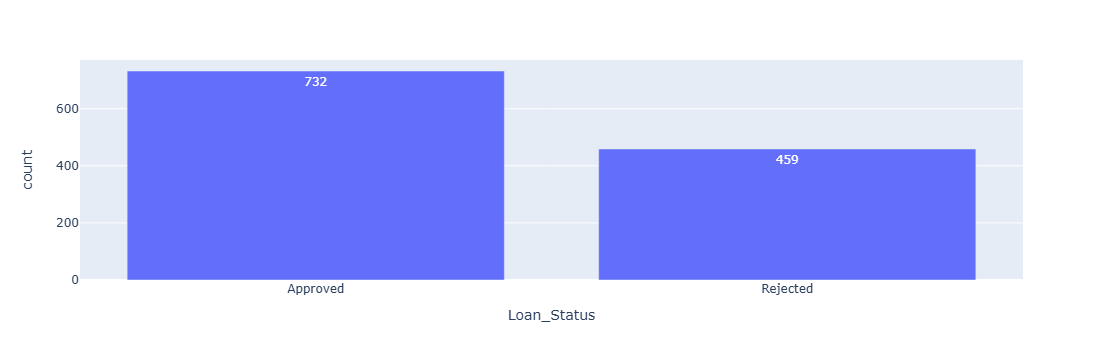

In [23]:
px.bar(df1['Loan_Status'].value_counts().reset_index() , x='Loan_Status', y = 'count' , text_auto=True)

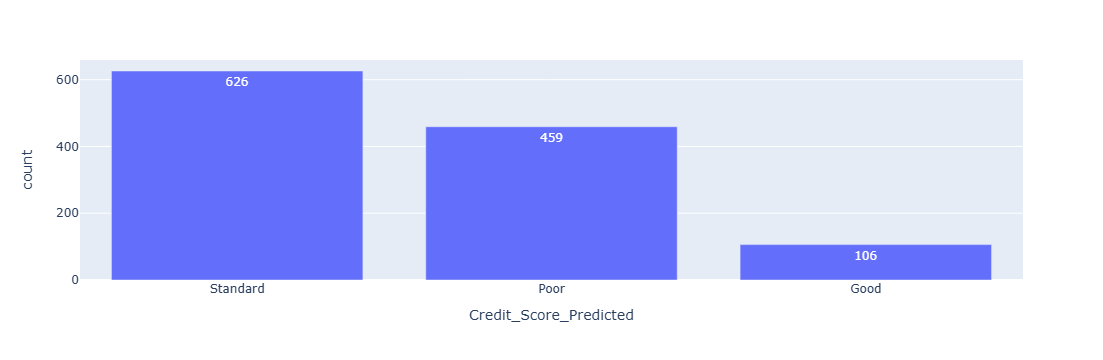

In [25]:
px.bar(df1['Credit_Score_Predicted'].value_counts().reset_index() , x='Credit_Score_Predicted', y = 'count' , text_auto=True)